## Name: Jose Aries E. De Los Santos
## DS397 Machine Problem 1 1b

# **PROBLEM 1: Taiwan House Price Prediction**

# **1b 2D Neural Network Regression**

# Import Necessary modules and Libraries

In [ ]:
# !pip install ipympl

In [ ]:
# %matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from google.colab import output
output.enable_custom_widget_manager()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
##For google collab code when importing from google drive
# from google.colab import drive

# drive.mount('/content/drive')
# myfile = "/content/drive/MyDrive/Colab Notebooks/DS 397/Machine Problem/real_estate_taiwan.csv"
# df = pd.read_csv(myfile)

Mounted at /content/drive


## Load the data set in Python using Pandas.

In [ ]:
df = pd.read_csv("real_estate_taiwan.csv")
# df.columns
#Check the parts of the data set that we will need
df.dropna(axis=0, inplace=True)                 # Discard rows with missing values
df[['X2 house age','X3 distance to the nearest MRT station','Y house price of unit area']].head(21)


,X2 house age,X3 distance to the nearest MRT station,Y house price of unit area
0,32.0,84.87882,37.9
1,19.5,306.59470,42.2
2,13.3,561.98450,47.3
3,13.3,561.98450,54.8
4,5.0,390.56840,43.1
5,7.1,2175.03000,32.1
6,34.5,623.47310,40.3
7,20.3,287.60250,46.7
8,31.7,5512.03800,18.8
9,17.9,1783.18000,22.1


In [ ]:
##Check some Statistics Information
df[['X2 house age','X3 distance to the nearest MRT station','Y house price of unit area']].describe()

,X2 house age,X3 distance to the nearest MRT station,Y house price of unit area
count,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,37.980193
std,11.392485,1262.109595,13.606488
min,0.000000,23.382840,7.600000
25%,9.025000,289.324800,27.700000
50%,16.100000,492.231300,38.450000
75%,28.150000,1454.279000,46.600000
max,43.800000,6488.021000,117.500000


## Extract the features and the target variable

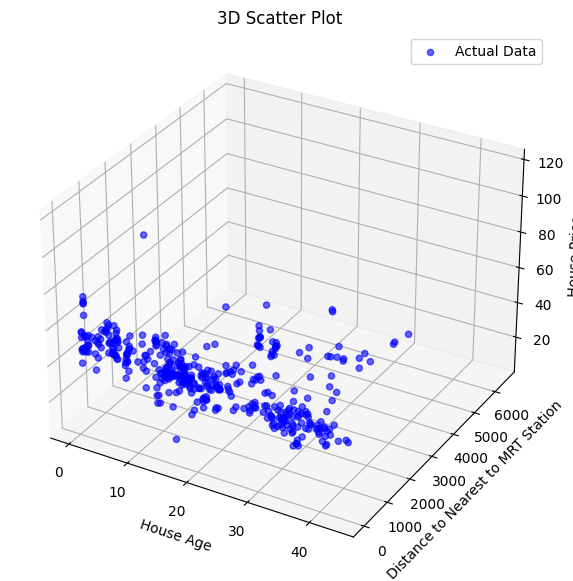

In [ ]:
# “House Age” and “Distance to nearest MRT station” features
# For y, take 'House Price'

# X = df.iloc[:,2:4].to_numpy()
# y = df.iloc[:,-1].to_numpy().reshape(-1,1)

#alternatively since we only have two features
X = df[["X2 house age","X3 distance to the nearest MRT station"]].to_numpy()
y = df["Y house price of unit area"].to_numpy().reshape(-1,1)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,0],X[:,1],y, color='blue', alpha=0.6,label="Actual Data")
ax.set_xlabel("House Age")
ax.set_ylabel("Distance to Nearest to MRT Station")
ax.set_zlabel("House Price")
ax.set_title("3D Scatter Plot")
plt.legend()
plt.show()


## Split the data into 70% training and 30% testing

(289, 2)
(289, 1)
(125, 2)
(125, 1)
289
125


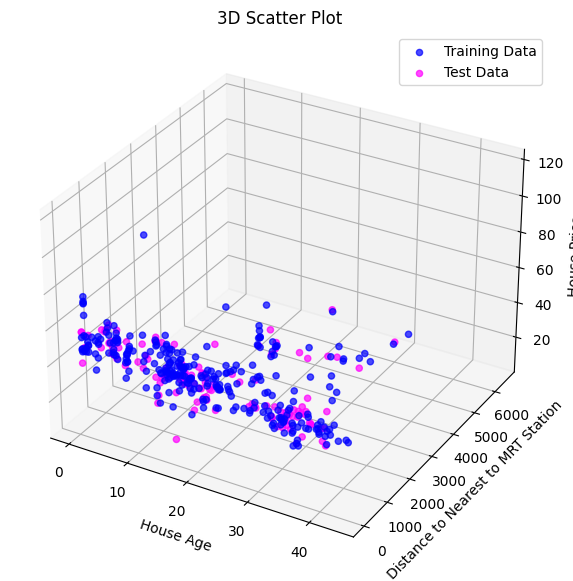

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##Checking the dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

N_train, N_test = len(y_train), len(y_test) ## To be used later for intercepts
print(N_train)
print(N_test)

# def plot2Ddata(X_train,X_test,y_train,y_test):
#     fig = plt.figure(figsize=(12,7))
#     ax = plt.axes(projection='3d')
#     ax.scatter3D(X_train[:,0],X_train[:,1],y_train,color='b',alpha=0.3)
#     ax.scatter3D(X_test[:,0],X_test[:,1],y_test,color='m',alpha=0.3)
#     return fig, ax

# plot2Ddata(X_train,X_test,y_train,y_test)
# plt.show()

##Plot Training data and Test Data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_train[:,0],X_train[:,1],y_train, color='blue', alpha=0.7,label="Training Data")
ax.scatter3D(X_test[:,0],X_test[:,1],y_test, color='magenta', alpha=0.7,label="Test Data")
ax.set_xlabel("House Age")
ax.set_ylabel("Distance to Nearest to MRT Station")
ax.set_zlabel("House Price")
ax.set_title("3D Scatter Plot")
plt.legend()
plt.show()

## Normalize the data using Standard Scaling
“fit_transform” on the training set, then “transform” on the test set

In [ ]:
scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

scalerY = StandardScaler()
y_train_scaled = scalerY.fit_transform(y_train)
y_test_scaled = scalerY.transform(y_test)

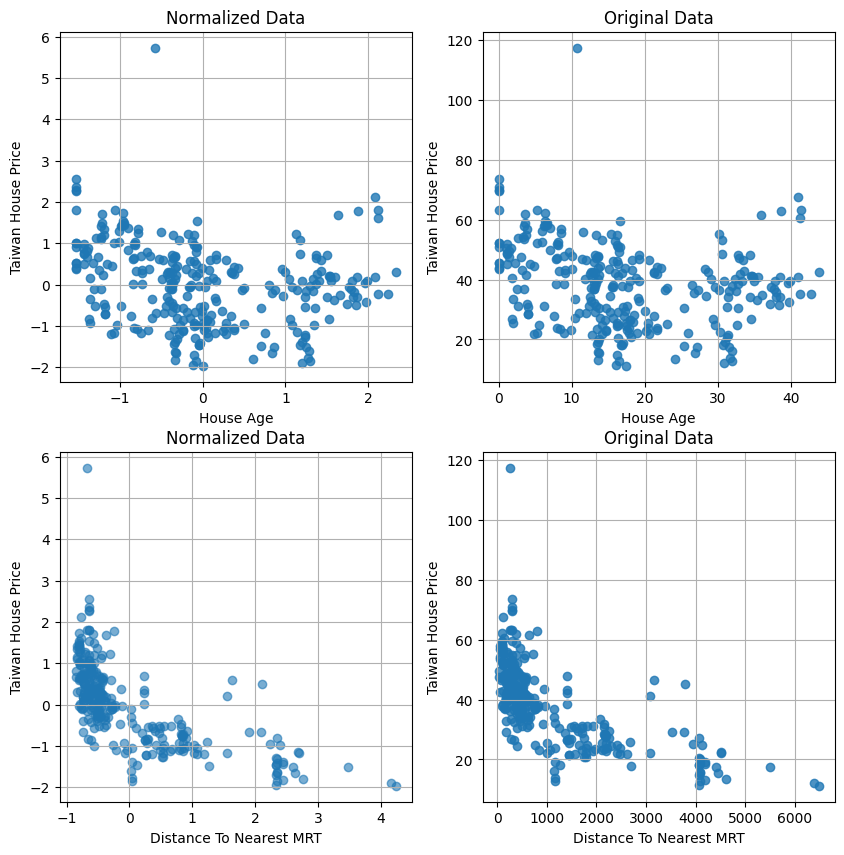

In [ ]:
plt.figure(figsize=(10,10))

##House Age vs House Price
plt.subplot(221)
plt.title('Normalized Data')
plt.scatter(X_train_scaled[:,0],y_train_scaled, alpha = 0.8)
plt.xlabel('House Age')
plt.ylabel('Taiwan House Price')
plt.grid()
plt.subplot(222)
plt.title('Original Data')
plt.scatter(X_train[:,0],y_train, alpha = 0.8)
plt.xlabel('House Age')
plt.ylabel('Taiwan House Price')
plt.grid()

## Distance vs House Price
plt.subplot(223)
plt.title('Normalized Data')
plt.scatter(X_train_scaled[:,1],y_train_scaled, alpha = 0.6)
plt.xlabel('Distance To Nearest MRT')
plt.ylabel('Taiwan House Price')
plt.grid()

plt.subplot(224)
plt.title('Original Data')
plt.scatter(X_train[:,1],y_train, alpha = 0.8)
plt.xlabel('Distance To Nearest MRT')
plt.ylabel('Taiwan House Price')
plt.grid()

plt.show()

# For Evaluation using R2 and RMSE

### Evaluate the model for training and test data

$\textbf{R}^{2}$:

$R^{2} = (1 - \frac{\sum^{n}_{i=1}(y_{i} - \hat{y}_{i})}{\sum^{n}_{i=1}(y_{i} - \bar{y}_{i})}) \cdot 100\%$

where:


*   $y_{i}$ actual values
*   $\hat{y}_{i}$ predicted values
*   $\bar{y}_{i}$ mean of the actual values



$\textbf{RMSE (Root Mean Squared Error)}$:

RMSE = $\sqrt{\frac{1}{n} \sum^{n}_{i=1} (y_{i} - \hat{y}_{i})^{2}}$

where:

*   $y_{i}$ actual values
*   $\hat{y}_{i}$ predicted values
*   n - total number of points





## **2D Neural Network Regression**



### Create MLP (Multilayer Perceptron) Class

In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases for the hidden layer and output layer
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def activation(self, x):
        return 1 / (1 + np.exp(-x))  # sigmoid
        return np.maximum(0, x)      # relu

    def activation_derivative(self, x):
        return x * (1 - x)           # sigmoid
        # return np.where(x > 0, 1, 0)  # relu

    def forward(self, inputs):
        # Forward propagation
        self.hidden_input = np.dot(inputs, self.weights_hidden) + self.bias_hidden
        self.hidden_output = self.activation(self.hidden_input)
        self.output_layer_input = np.dot(self.hidden_output, self.weights_output) + self.bias_output
        self.output = self.output_layer_input
        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backpropagation and Stochastic Gradient Descent
        batch_mse = 0

        for i in range(len(inputs)):
            # Single data point forward and backward pass
            input_data = np.array([inputs[i,:]])
            target_data = targets[i]

            # Forward pass
            self.forward(input_data)

            # Backward pass
            output_error = -2 * (target_data - self.output)
            hidden_error = output_error.dot(self.weights_output.T) * self.activation_derivative(self.hidden_output)

            # Update weights and biases using Stochastic Gradient Descent
            self.weights_output -= learning_rate * self.hidden_output.T.dot(output_error)
            self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
            self.weights_hidden -= learning_rate * input_data.T.dot(hidden_error)
            self.bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

            # Add to the batch loss function
            batch_mse += (target_data - self.output) ** 2

        return batch_mse / len(inputs)

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward and backward pass for each data point
            batch_mse = self.backward(inputs, targets, learning_rate)

            # Print the mean squared error for every 1000 epochs
            if (epoch+1) % 1000 == 0 or epoch == 0:
                print(f'Epoch {epoch+1}, Mean Squared Error: {batch_mse}')

    def predict(self, inputs):
        # Make predictions using the trained model
        return self.forward(inputs)

In [ ]:
###Not sure about this code yet so for this problem I only used one layer
class MLP2:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        # Initialize weights and biases for the hidden layers and output layer
        self.weights_hidden1 = np.random.randn(input_size, hidden_size1)
        self.bias_hidden1 = np.zeros((1, hidden_size1))
        self.weights_hidden2 = np.random.randn(hidden_size1, hidden_size2)
        self.bias_hidden2 = np.zeros((1, hidden_size2))
        self.weights_output = np.random.randn(hidden_size2, output_size)
        self.bias_output = np.zeros((1, output_size))

    def activation(self, x):
        return 1 / (1 + np.exp(-x))  # sigmoid

    def activation_derivative(self, x):
        return x * (1 - x)           # sigmoid

    def forward(self, inputs):
        # Forward propagation
        self.hidden_input1 = np.dot(inputs, self.weights_hidden1) + self.bias_hidden1
        self.hidden_output1 = self.activation(self.hidden_input1)
        self.hidden_input2 = np.dot(self.hidden_output1, self.weights_hidden2) + self.bias_hidden2
        self.hidden_output2 = self.activation(self.hidden_input2)
        self.output_layer_input = np.dot(self.hidden_output2, self.weights_output) + self.bias_output
        self.output = self.output_layer_input
        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backpropagation and Stochastic Gradient Descent
        batch_mse = 0

        for i in range(len(inputs)):
            # Single data point forward and backward pass
            input_data = np.array([inputs[i,:]])
            target_data = targets[i]

            # Forward pass
            self.forward(input_data)

            # Backward pass
            output_error = -2 * (target_data - self.output)
            hidden_error2 = output_error.dot(self.weights_output.T) * self.activation_derivative(self.hidden_output2)
            hidden_error1 = hidden_error2.dot(self.weights_hidden2.T) * self.activation_derivative(self.hidden_output1)

            # Update weights and biases using Stochastic Gradient Descent
            self.weights_output -= learning_rate * self.hidden_output2.T.dot(output_error)
            self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
            self.weights_hidden2 -= learning_rate * self.hidden_output1.T.dot(hidden_error2)
            self.bias_hidden2 -= learning_rate * np.sum(hidden_error2, axis=0, keepdims=True)
            self.weights_hidden1 -= learning_rate * input_data.T.dot(hidden_error1)
            self.bias_hidden1 -= learning_rate * np.sum(hidden_error1, axis=0, keepdims=True)

            # Add to the batch loss function
            batch_mse += (target_data - self.output) ** 2

        return batch_mse / len(inputs)

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward and backward pass for each data point
            batch_mse = self.backward(inputs, targets, learning_rate)

            # Print the mean squared error for every 1000 epochs
            if (epoch+1) % 1000 == 0 or epoch == 0:
                print(f'Epoch {epoch+1}, Mean Squared Error: {batch_mse}')

    def predict(self, inputs):
        # Make predictions using the trained model
        return self.forward(inputs)


#### Train the MLP

##### *1st Trial*

In [ ]:
#First Trial
# Define your input, target, and parameters
input_size = 2
hidden_size = 22
output_size = 1
learning_rate = 0.001
epochs = 10000

# Create an instance of MLP
mlp2D = MLP(input_size, hidden_size, output_size)

# Train the MLP
mlp2D.train(X_train_scaled, y_train_scaled, epochs, learning_rate)

Epoch 1, Mean Squared Error: [[2.00812787]]
Epoch 1000, Mean Squared Error: [[0.37391122]]
Epoch 2000, Mean Squared Error: [[0.36960715]]
Epoch 3000, Mean Squared Error: [[0.36801387]]
Epoch 4000, Mean Squared Error: [[0.36682708]]
Epoch 5000, Mean Squared Error: [[0.36573122]]
Epoch 6000, Mean Squared Error: [[0.36463543]]
Epoch 7000, Mean Squared Error: [[0.3634912]]
Epoch 8000, Mean Squared Error: [[0.36226789]]
Epoch 9000, Mean Squared Error: [[0.3609589]]
Epoch 10000, Mean Squared Error: [[0.35959428]]


###### 1st Trial Metric

In [ ]:
##Metric

train_rmse = 0
test_rmse = 0
train_tss = 0
test_tss = 0
y_train_mean = np.mean(y_train_scaled)
y_test_mean = np.mean(y_test_scaled)
for i in range(len(X_train_scaled)):
    train_rmse += (y_train_scaled[i] - mlp2D.predict(X_train_scaled[i,:])) ** 2
    train_tss += (y_train_scaled[i] - y_train_mean) ** 2
for i in range(len(X_test_scaled)):
    test_rmse += (y_test_scaled[i] - mlp2D.predict(X_test_scaled[i,:])) ** 2
    test_tss += (y_test_scaled[i] - y_test_mean) ** 2

train_R2 = 1 - train_rmse / train_tss
test_R2 = 1 - test_rmse / test_tss
train_rmse = np.sqrt(train_rmse / len(X_train))
test_rmse = np.sqrt(test_rmse / len(X_test))
print(f'Training RMSE: {train_rmse}, Training R2: {train_R2}')
print(f'Test RMSE:     {test_rmse}, Test R2: {test_R2}')

Training RMSE: [[0.55618482]], Training R2: [[0.69065845]]
Test RMSE:     [[0.59851249]], Test R2: [[0.59969751]]


###### 1st Trial 3D plot

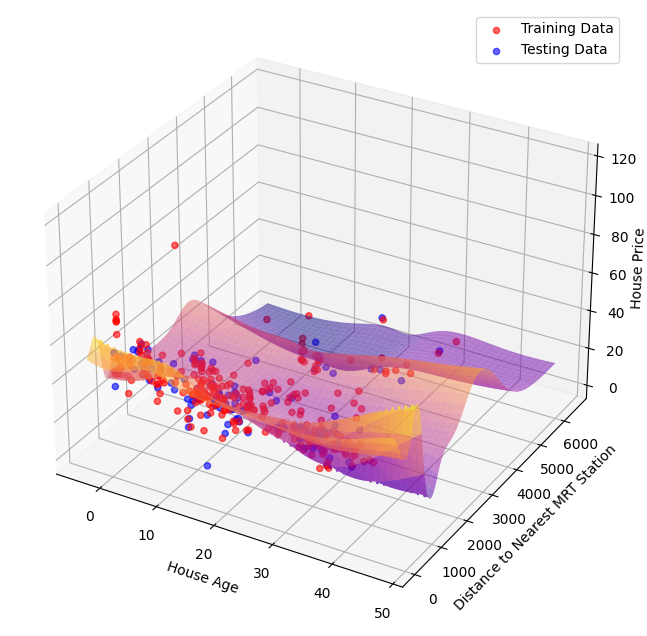

In [ ]:
# Predict house prices for surface plot
x1 = np.linspace(np.min(X_train[:,0])-4, np.max(X_train[:,0])+4, 200)
x2 = np.linspace(np.min(X_train[:,1])-4, np.max(X_train[:,1])+4, 200)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]
X_grid_scaled = scalerX.transform(X_grid)
y_pred_scaled = mlp2D.predict(X_grid_scaled)
y_pred = scalerY.inverse_transform(y_pred_scaled).reshape(X1.shape)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_pred, alpha=0.5, cmap='plasma')

# Scatter plot of the training data points
ax.scatter3D(X_train[:,0], X_train[:,1], y_train, color='r',alpha=0.6, label='Training Data')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, color='b',alpha=0.6, label='Testing Data')

# Set labels
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to Nearest MRT Station')
ax.set_zlabel('House Price')
ax.zaxis.labelpad = -0.4

plt.legend()
plt.show()

##### *2nd Trial*

In [ ]:
#2nd Trial
# Define your input, target, and parameters
input_size = 2
hidden_size = 25
output_size = 1
learning_rate = 0.005
epochs = 10000

# Create an instance of MLP
mlp2D = MLP(input_size, hidden_size, output_size)

# Train the MLP
mlp2D.train(X_train_scaled, y_train_scaled, epochs, learning_rate)

Epoch 1, Mean Squared Error: [[1.11980674]]
Epoch 1000, Mean Squared Error: [[0.37641935]]
Epoch 2000, Mean Squared Error: [[0.36509898]]
Epoch 3000, Mean Squared Error: [[0.35642743]]
Epoch 4000, Mean Squared Error: [[0.35019771]]
Epoch 5000, Mean Squared Error: [[0.34657663]]
Epoch 6000, Mean Squared Error: [[0.3440977]]
Epoch 7000, Mean Squared Error: [[0.33797829]]
Epoch 8000, Mean Squared Error: [[0.33101659]]
Epoch 9000, Mean Squared Error: [[0.32687293]]
Epoch 10000, Mean Squared Error: [[0.32445991]]


###### 2nd Trial Metric

In [ ]:
##Metric

train_rmse = 0
test_rmse = 0
train_tss = 0
test_tss = 0
y_train_mean = np.mean(y_train_scaled)
y_test_mean = np.mean(y_test_scaled)
for i in range(len(X_train_scaled)):
    train_rmse += (y_train_scaled[i] - mlp2D.predict(X_train_scaled[i,:])) ** 2
    train_tss += (y_train_scaled[i] - y_train_mean) ** 2
for i in range(len(X_test_scaled)):
    test_rmse += (y_test_scaled[i] - mlp2D.predict(X_test_scaled[i,:])) ** 2
    test_tss += (y_test_scaled[i] - y_test_mean) ** 2

train_R2 = 1 - train_rmse / train_tss
test_R2 = 1 - test_rmse / test_tss
train_rmse = np.sqrt(train_rmse / len(X_train))
test_rmse = np.sqrt(test_rmse / len(X_test))
print(f'Training RMSE: {train_rmse}, Training R2: {train_R2}')
print(f'Test RMSE:     {test_rmse}, Test R2: {test_R2}')

Training RMSE: [[0.55992373]], Training R2: [[0.68648541]]
Test RMSE:     [[0.59998358]], Test R2: [[0.59772728]]


###### 2nd Trial 3D plot

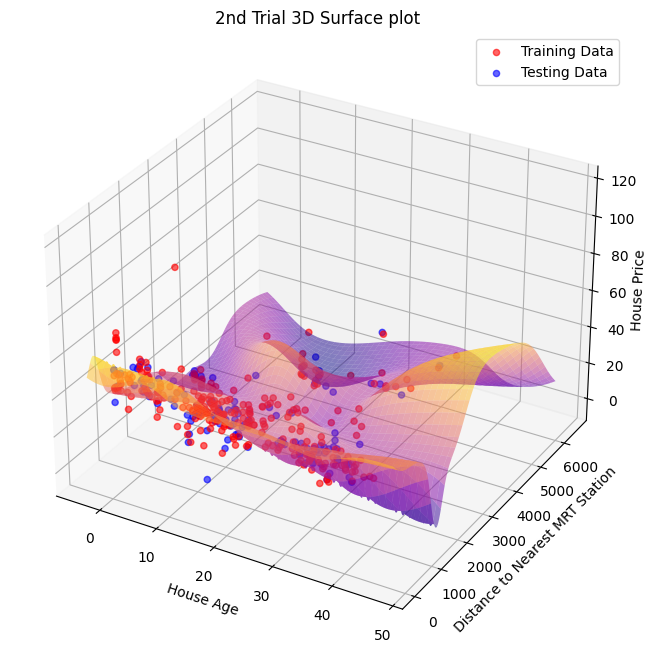

In [ ]:
# Predict house prices for surface plot
x1 = np.linspace(np.min(X_train[:,0])-4, np.max(X_train[:,0])+4, 200)
x2 = np.linspace(np.min(X_train[:,1])-4, np.max(X_train[:,1])+4, 200)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]
X_grid_scaled = scalerX.transform(X_grid)
y_pred_scaled = mlp2D.predict(X_grid_scaled)
y_pred = scalerY.inverse_transform(y_pred_scaled).reshape(X1.shape)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_pred, alpha=0.5, cmap='plasma')

# Scatter plot of the training data points
ax.scatter3D(X_train[:,0], X_train[:,1], y_train, color='r',alpha=0.6, label='Training Data')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, color='b',alpha=0.6, label='Testing Data')

# Set labels
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to Nearest MRT Station')
ax.set_zlabel('House Price')
ax.zaxis.labelpad = -0.3
ax.set_title("2nd Trial 3D Surface plot")

plt.legend()
plt.show()

##### 3rd Trial

In [ ]:
#3rd Trial
# Define your input, target, and parameters
input_size = 2
hidden_size = 30
output_size = 1
learning_rate = 0.01
epochs = 10000

# Create an instance of MLP
mlp2D = MLP(input_size, hidden_size, output_size)

# Train the MLP
mlp2D.train(X_train_scaled, y_train_scaled, epochs, learning_rate)

Epoch 1, Mean Squared Error: [[0.55607847]]
Epoch 1000, Mean Squared Error: [[0.38079174]]
Epoch 2000, Mean Squared Error: [[0.36502791]]
Epoch 3000, Mean Squared Error: [[0.35306841]]
Epoch 4000, Mean Squared Error: [[0.34103312]]
Epoch 5000, Mean Squared Error: [[0.33212039]]
Epoch 6000, Mean Squared Error: [[0.3247728]]
Epoch 7000, Mean Squared Error: [[0.31951958]]
Epoch 8000, Mean Squared Error: [[0.31490449]]
Epoch 9000, Mean Squared Error: [[0.31205359]]
Epoch 10000, Mean Squared Error: [[0.30939825]]


###### 3rd Trial Metric

In [ ]:
##3rd Trial Metric
##Metric

train_rmse = 0
test_rmse = 0
train_tss = 0
test_tss = 0
y_train_mean = np.mean(y_train_scaled)
y_test_mean = np.mean(y_test_scaled)
for i in range(len(X_train_scaled)):
    train_rmse += (y_train_scaled[i] - mlp2D.predict(X_train_scaled[i,:])) ** 2
    train_tss += (y_train_scaled[i] - y_train_mean) ** 2
for i in range(len(X_test_scaled)):
    test_rmse += (y_test_scaled[i] - mlp2D.predict(X_test_scaled[i,:])) ** 2
    test_tss += (y_test_scaled[i] - y_test_mean) ** 2

train_R2 = 1 - train_rmse / train_tss
test_R2 = 1 - test_rmse / test_tss
train_rmse = np.sqrt(train_rmse / len(X_train))
test_rmse = np.sqrt(test_rmse / len(X_test))
print(f'Training RMSE: {train_rmse}, Training R2: {train_R2}')
print(f'Test RMSE:     {test_rmse}, Test R2: {test_R2}')

Training RMSE: [[0.54242932]], Training R2: [[0.70577043]]
Test RMSE:     [[0.61441606]], Test R2: [[0.57814135]]


###### 3rd Trial 3D plot

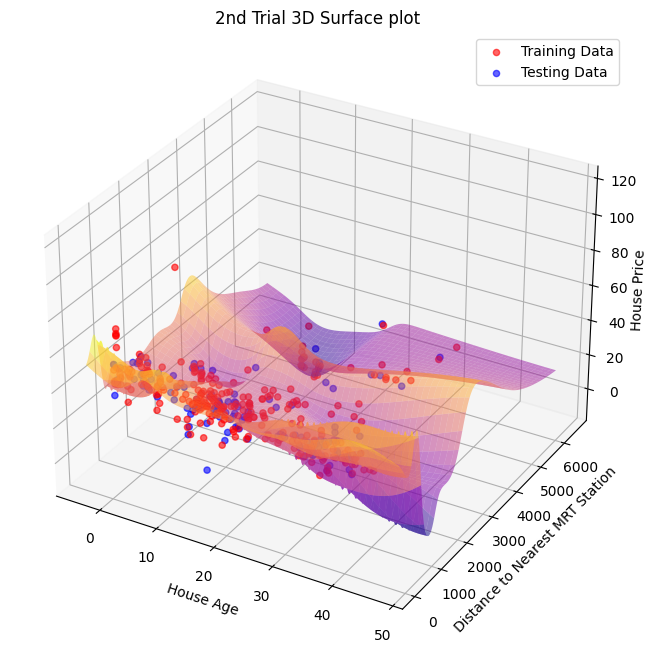

In [ ]:
# Predict house prices for surface plot
x1 = np.linspace(np.min(X_train[:,0])-4, np.max(X_train[:,0])+4, 200)
x2 = np.linspace(np.min(X_train[:,1])-4, np.max(X_train[:,1])+4, 200)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]
X_grid_scaled = scalerX.transform(X_grid)
y_pred_scaled = mlp2D.predict(X_grid_scaled)
y_pred = scalerY.inverse_transform(y_pred_scaled).reshape(X1.shape)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_pred, alpha=0.5, cmap='plasma')

# Scatter plot of the training data points
ax.scatter3D(X_train[:,0], X_train[:,1], y_train, color='r',alpha=0.6, label='Training Data')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, color='b',alpha=0.6, label='Testing Data')

# Set labels
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to Nearest MRT Station')
ax.set_zlabel('House Price')
ax.zaxis.labelpad = -0.4
ax.set_title("2nd Trial 3D Surface plot")

plt.legend()
plt.show()

##### 4th Trial


In [ ]:
#4th Trial
# Define your input, target, and parameters
input_size = 2
hidden_size = 23
output_size = 1
learning_rate = 0.008
epochs = 10000

# Create an instance of MLP
mlp2D = MLP(input_size, hidden_size, output_size)

# Train the MLP
mlp2D.train(X_train_scaled, y_train_scaled, epochs, learning_rate)

Epoch 1, Mean Squared Error: [[0.66925752]]
Epoch 1000, Mean Squared Error: [[0.3736275]]
Epoch 2000, Mean Squared Error: [[0.35860511]]
Epoch 3000, Mean Squared Error: [[0.3497151]]
Epoch 4000, Mean Squared Error: [[0.34342985]]
Epoch 5000, Mean Squared Error: [[0.33828929]]
Epoch 6000, Mean Squared Error: [[0.33134289]]
Epoch 7000, Mean Squared Error: [[0.3259625]]
Epoch 8000, Mean Squared Error: [[0.32179991]]
Epoch 9000, Mean Squared Error: [[0.31827284]]
Epoch 10000, Mean Squared Error: [[0.31537026]]


###### 4th Trial Metric

In [ ]:
##4th Trial Metric
##Metric

train_rmse = 0
test_rmse = 0
train_tss = 0
test_tss = 0
y_train_mean = np.mean(y_train_scaled)
y_test_mean = np.mean(y_test_scaled)
for i in range(len(X_train_scaled)):
    train_rmse += (y_train_scaled[i] - mlp2D.predict(X_train_scaled[i,:])) ** 2
    train_tss += (y_train_scaled[i] - y_train_mean) ** 2
for i in range(len(X_test_scaled)):
    test_rmse += (y_test_scaled[i] - mlp2D.predict(X_test_scaled[i,:])) ** 2
    test_tss += (y_test_scaled[i] - y_test_mean) ** 2

train_R2 = 1 - train_rmse / train_tss
test_R2 = 1 - test_rmse / test_tss
train_rmse = np.sqrt(train_rmse / len(X_train))
test_rmse = np.sqrt(test_rmse / len(X_test))
print(f'Training RMSE: {train_rmse}, Training R2: {train_R2}')
print(f'Test RMSE:     {test_rmse}, Test R2: {test_R2}')

Training RMSE: [[0.55249901]], Training R2: [[0.69474484]]
Test RMSE:     [[0.61423161]], Test R2: [[0.57839459]]


###### 4th Trial 3D Plot

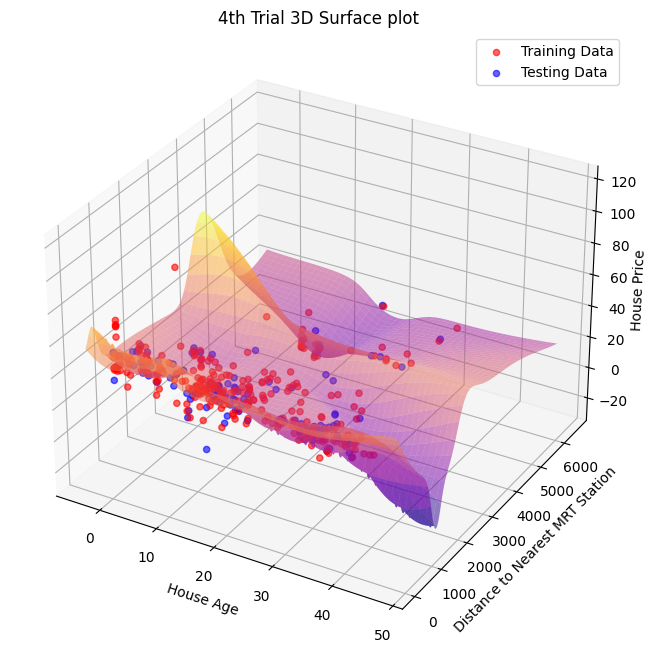

In [ ]:
# Predict house prices for surface plot
x1 = np.linspace(np.min(X_train[:,0])-4, np.max(X_train[:,0])+4, 200)
x2 = np.linspace(np.min(X_train[:,1])-4, np.max(X_train[:,1])+4, 200)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]
X_grid_scaled = scalerX.transform(X_grid)
y_pred_scaled = mlp2D.predict(X_grid_scaled)
y_pred = scalerY.inverse_transform(y_pred_scaled).reshape(X1.shape)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_pred, alpha=0.5, cmap='plasma')

# Scatter plot of the training data points
ax.scatter3D(X_train[:,0], X_train[:,1], y_train, color='r',alpha=0.6, label='Training Data')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, color='b',alpha=0.6, label='Testing Data')

# Set labels
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to Nearest MRT Station')
ax.set_zlabel('House Price')
ax.zaxis.labelpad = -0.4
ax.set_title("4th Trial 3D Surface plot")

plt.legend()
plt.show()

##### 5th Trial

In [ ]:
#5th Trial
# Define your input, target, and parameters
input_size = 2
hidden_size = 35
output_size = 1
learning_rate = 0.008
epochs = 10000

# Create an instance of MLP
mlp2D = MLP(input_size, hidden_size, output_size)

# Train the MLP
mlp2D.train(X_train_scaled, y_train_scaled, epochs, learning_rate)

Epoch 1, Mean Squared Error: [[0.74332688]]
Epoch 1000, Mean Squared Error: [[0.38043539]]
Epoch 2000, Mean Squared Error: [[0.36274432]]
Epoch 3000, Mean Squared Error: [[0.35331643]]
Epoch 4000, Mean Squared Error: [[0.34671889]]
Epoch 5000, Mean Squared Error: [[0.33994068]]
Epoch 6000, Mean Squared Error: [[0.33149673]]
Epoch 7000, Mean Squared Error: [[0.32649213]]
Epoch 8000, Mean Squared Error: [[0.32339122]]
Epoch 9000, Mean Squared Error: [[0.32103503]]
Epoch 10000, Mean Squared Error: [[0.31891753]]


###### 5th Trial Metric

In [ ]:
##5th Trial Metric
##Metric

train_rmse = 0
test_rmse = 0
train_tss = 0
test_tss = 0
y_train_mean = np.mean(y_train_scaled)
y_test_mean = np.mean(y_test_scaled)
for i in range(len(X_train_scaled)):
    train_rmse += (y_train_scaled[i] - mlp2D.predict(X_train_scaled[i,:])) ** 2
    train_tss += (y_train_scaled[i] - y_train_mean) ** 2
for i in range(len(X_test_scaled)):
    test_rmse += (y_test_scaled[i] - mlp2D.predict(X_test_scaled[i,:])) ** 2
    test_tss += (y_test_scaled[i] - y_test_mean) ** 2

train_R2 = 1 - train_rmse / train_tss
test_R2 = 1 - test_rmse / test_tss
train_rmse = np.sqrt(train_rmse / len(X_train))
test_rmse = np.sqrt(test_rmse / len(X_test))
print(f'Training RMSE: {train_rmse}, Training R2: {train_R2}')
print(f'Test RMSE:     {test_rmse}, Test R2: {test_R2}')

Training RMSE: [[0.55212409]], Training R2: [[0.69515899]]
Test RMSE:     [[0.61372745]], Test R2: [[0.57908641]]


###### 5th Trial 3D Plot

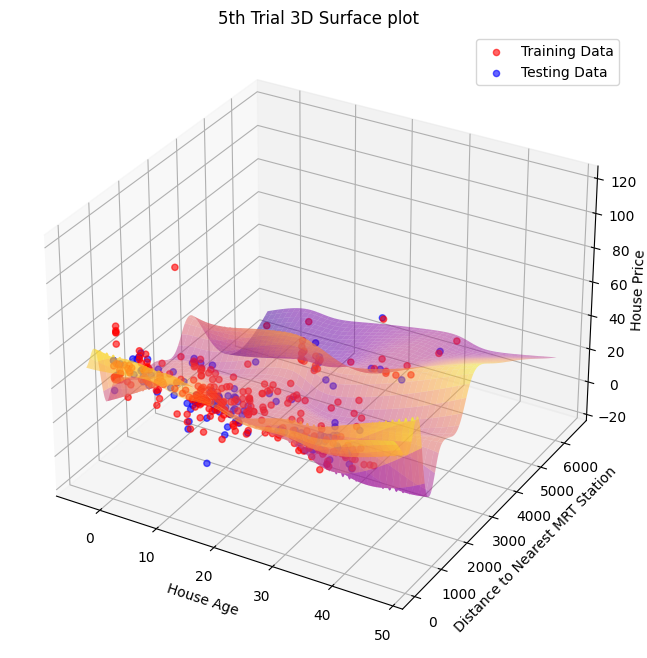

In [ ]:
# Predict house prices for surface plot
x1 = np.linspace(np.min(X_train[:,0])-4, np.max(X_train[:,0])+4, 200)
x2 = np.linspace(np.min(X_train[:,1])-4, np.max(X_train[:,1])+4, 200)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]
X_grid_scaled = scalerX.transform(X_grid)
y_pred_scaled = mlp2D.predict(X_grid_scaled)
y_pred = scalerY.inverse_transform(y_pred_scaled).reshape(X1.shape)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_pred, alpha=0.5, cmap='plasma')

# Scatter plot of the training data points
ax.scatter3D(X_train[:,0], X_train[:,1], y_train, color='r',alpha=0.6, label='Training Data')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, color='b',alpha=0.6, label='Testing Data')

# Set labels
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to Nearest MRT Station')
ax.set_zlabel('House Price')
ax.zaxis.labelpad = -0.4
ax.set_title("5th Trial 3D Surface plot")

plt.legend()
plt.show()

##### Using Built-in

In [ ]:
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define the neural network architecture
model = Sequential([
    Dense(10, activation='sigmoid', input_shape=(2,)),
    Dense(15, activation='relu'),
    Dense(1)  # Output layer, no activation function for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for regression

# Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=1000, batch_size=32, validation_split=0.3)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test_scaled)
# Print the mean squared error
if (epochs/1000) % 100 == 0:
  print(f'Mean Squared Error: {test_loss}')

# Make predictions
predictions_scaled = model.predict(X_test_scaled)

# Inverse scaling to get actual predictions
predictions = scalerY.inverse_transform(predictions_scaled)

Epoch 1/1000
7/7 [==============================] - 1s 34ms/step - loss: 1.0680 - val_loss: 0.9753
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.9692 - val_loss: 0.8683
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8974 - val_loss: 0.7898
Epoch 4/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.8504 - val_loss: 0.7318
Epoch 5/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8082 - val_loss: 0.6995
Epoch 6/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7784 - val_loss: 0.6740
Epoch 7/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7529 - val_loss: 0.6506
Epoch 8/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.7311 - val_loss: 0.6299
Epoch 9/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.7080 - val_loss: 0.6146
Epoch 10/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.6901 - val_loss: 0.5975
Epoch 11/1000
7/7

###### Calculate Metric from Built-in

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2) score: {r2}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

R-squared (R2) score: 0.6115785816475643
Root Mean Squared Error (RMSE): 8.136118165789703


###### 3D plot from Built-in

313/313 [==============================] - 1s 5ms/step


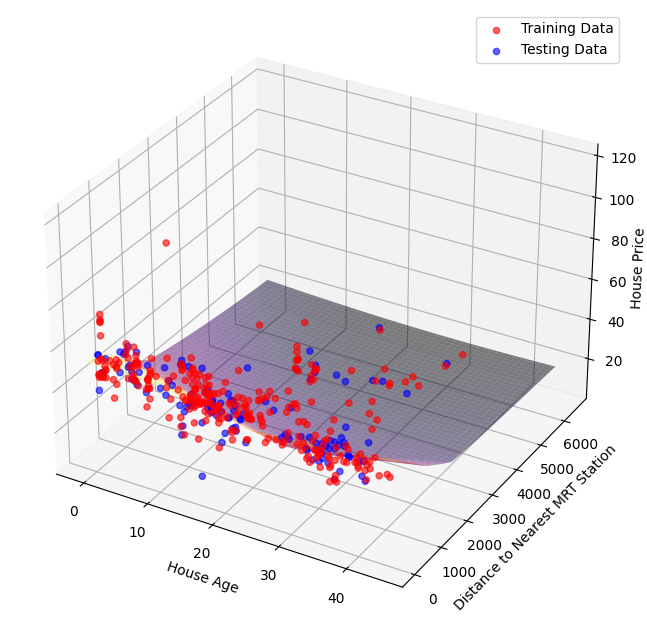

In [ ]:
# Predict house prices for surface plot
x1 = np.linspace(np.min(X_train[:,0])-1, np.max(X_train[:,0])+1, 100)
x2 = np.linspace(np.min(X_train[:,1])-1, np.max(X_train[:,1])+1, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]
X_grid_scaled = scalerX.transform(X_grid)
y_pred_scaled = model.predict(X_grid_scaled)
y_pred = scalerY.inverse_transform(y_pred_scaled).reshape(X1.shape)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_pred, alpha=0.5, cmap='inferno')

# Scatter plot of the training data points
ax.scatter3D(X_train[:,0], X_train[:,1], y_train, color='r',alpha=0.6, label='Training Data')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, color='b',alpha=0.6, label='Testing Data')

# Set labels
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to Nearest MRT Station')
ax.set_zlabel('House Price')
ax.zaxis.labelpad = -0.4

plt.legend()
plt.show()

# **What can be said about the performance of Neural Networks for Regression**


Neural Network based on how I understand this is that, it is a Machine Learning method or specificall a Deep Learning method that tries give the best function $f(\mathbb{x})$ that will approximate the relationship among our datapoints $\{ x_{i}, y_{i} \}_{i=1}^{N}$ regardless whether the relationsionship in our dataset is linear or nonlinear. This was theoretically proven by the **Universal Approximation Property**. For this problem we are training a Neural Network for regression, so the appropriate objective function to be used will be the Mean Squared Error function, $\frac{1}{n}\sum_{i=1}^{n} (y_{predicted} - y_{true})^{2}$.

For the case of Neural Networks, we are trying to train a model via forward propagation and backpropagation, using two features from our dataset which is the $\textit{House age}$ and the $\textit{Distance to the nearest MRT station}$ the predict a target which is our $\textit{House Price}$ and compare it to the actual House price in our dataset and minimize the residual or difference between the predicted value and the actual value which also happens during the training process or phase of our Neural Network. Based on our metric in all our 5 trials, I can say we have an average of around $70 \%$ for our $R^{2}$ in our dataset and an average of $60 \%$ in our testing dataset and our RMSE in our Neural Network is smaller than what it was seen from Multiple Linear regression in 1a. So the model accounts for 60% of the variability observed in the dependent variable (testing data set). Neural Network is also dependent to our hyperparameters, like learning rate, epochs, and its other parts like the activation functions used for each hidden layer and the objective or cost function. It means that we can still improve the performance of our model, depending on how to tune the hyperparameters of our model.

However, hyperparameter tuning is also subject to trial and error. The optimizer used is also a huge factor when training a Neural Network, we might get a better or not performance if we used optimizers such as RMSprop, Adaptive Moment Estimation, and etc.

There is no perfect hyperparameter or optimizer when training a Neural Network, same with creating our own optimizers, there is no perfect optimization algorithm. It will always depend on the type of dataset that we have and the type of problem that we are trying to solve using any of the Machine Learning Methods present.



# Comparison of Neural Networks and Multiple Regression


Based on what I explained on 1a and here on 1b, it seems that Neural Networks performed better. First I observed that the data itself does not have a good linear relationship between the chosen features "House Price" and "Distance to Nearest MRT". The dataset has some outliers as well, Neural Networks tried its best to approximate the best function that describes the relationship between the features and the target. It can also be seen that the average RMSE of Neural Networks among the 5 trials is lower compared to Multiple Linear Regression and the $R^{2}$ metric of Neural Networks for this dataset "Taiwan House Prediction" is higher than Multiple Linear Regression.